In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load phantom data
psis_fine_new_bounds = np.load('sxr_samples_fine_anisotropic_new_bounds/psis.npy')
sxr_samples_fine_new_bounds  = np.load('sxr_samples_fine_anisotropic_new_bounds/sxr_samples_with_background.npy')
alphas_fine_new_bounds  = np.load('sxr_samples_fine_anisotropic_new_bounds/alpha_random_values.npy')
trim_val_fine_new_bounds = np.load('sxr_samples_fine_anisotropic_new_bounds/trimming_values.npy')
random_peak_vals_fine_new_bounds  = np.load('sxr_samples_fine_anisotropic_new_bounds/peak_values_gaussian_background.npy')

psis_at_source = np.load('sxr_samples_fine_anisotropic_new_bounds/psis_at_source.npy')
diffusive_steps = np.load('sxr_samples_fine_anisotropic_new_bounds/diffusive_steps.npy')

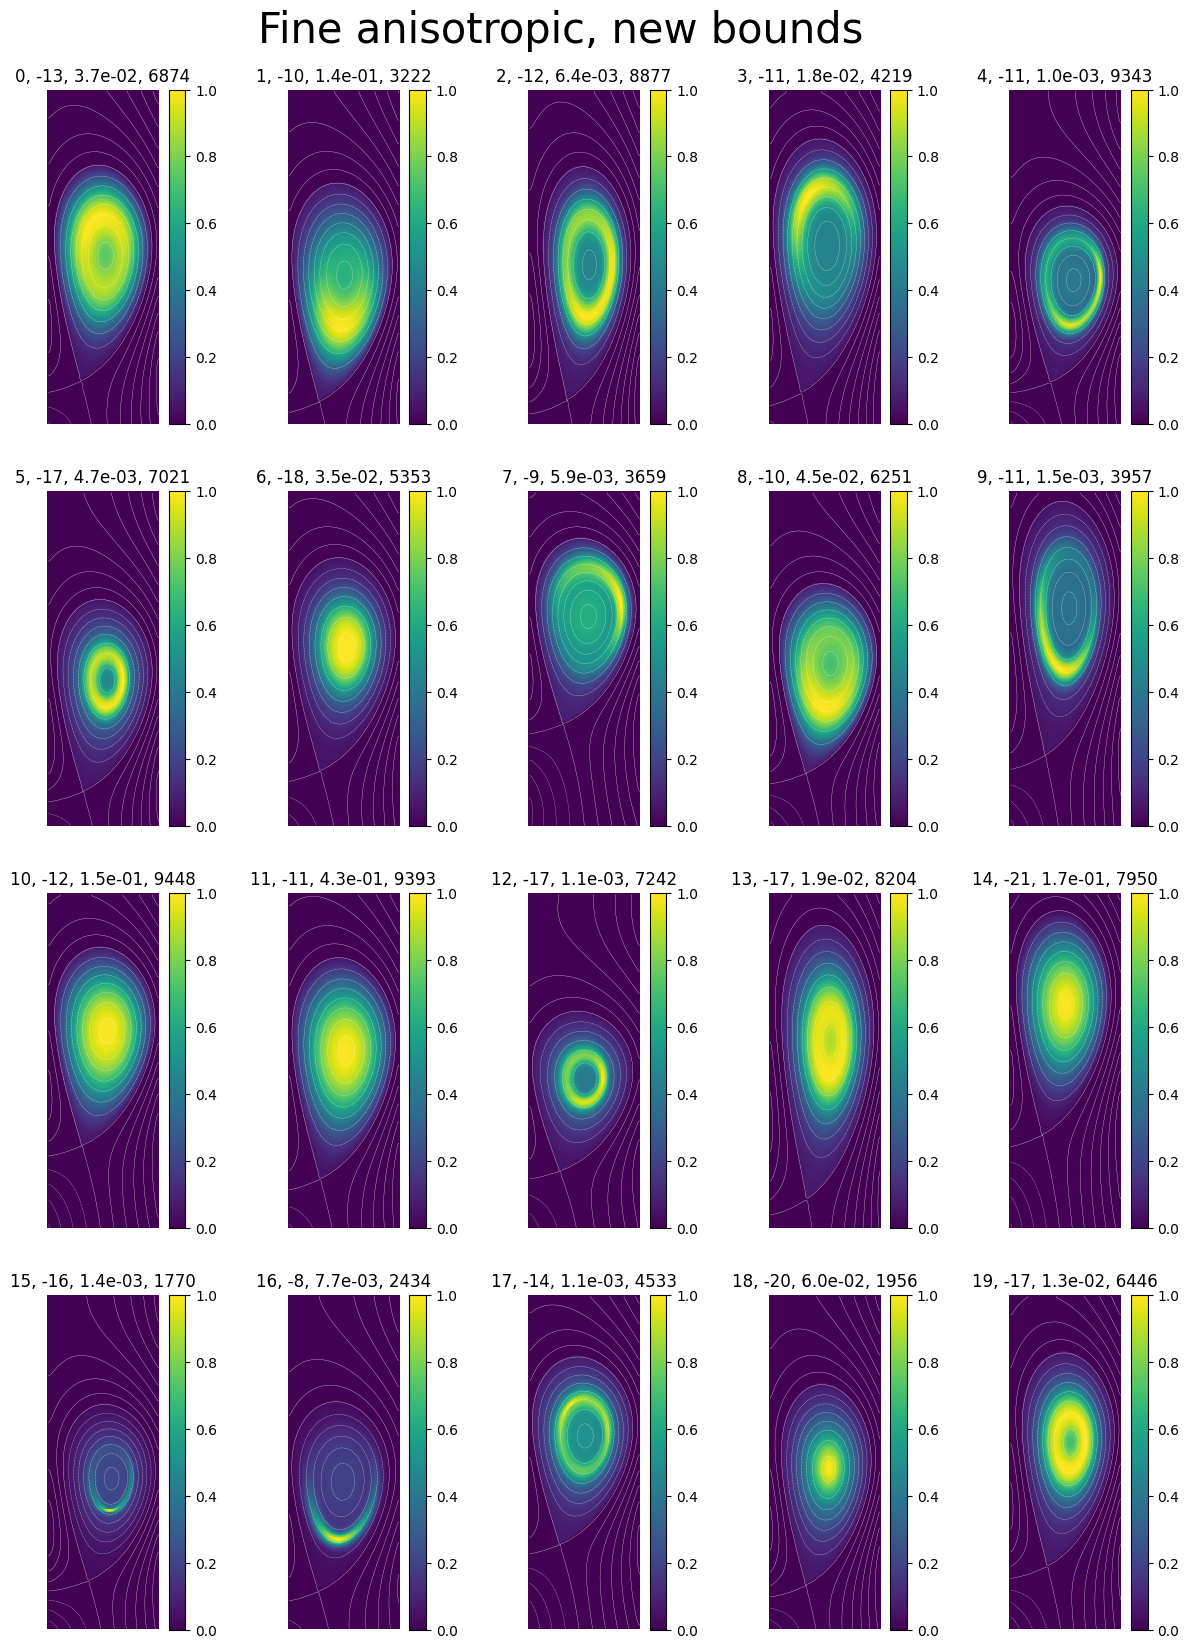

In [6]:
fig,ax=plt.subplots(4,5, figsize=(15,20))
block=0
for i in range(4):
    for j in range(5):
        im=ax[i,j].imshow(sxr_samples_fine_new_bounds[20*block+i*5+j, :, :].squeeze())
        ax[i, j].contour(psis_fine_new_bounds[20*block+i*5+j, :, :], origin="lower", levels=15, antialiased=True, colors="w", linewidths=0.2)
        plt.colorbar(im, ax=ax[i,j])
        ax[i,j].axis('off')
        ax[i,j].set_title(r"{}, {}, {:.1e}, {}".format(20*block+i*5+j,
                                                    int(psis_at_source[20*block+i*5+j]),
                                                    alphas_fine_new_bounds[20*block+i*5+j],
                                                    int(diffusive_steps[20*block+i*5+j])))
plt.suptitle("Fine anisotropic, new bounds", y=0.92, fontsize=30)
plt.show()

In [4]:
reg_param = np.array([])

In [10]:
reg_param_data = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/tuning_data.npy',
                         allow_pickle=True)
best_reg_param = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/best_hyperparams.npy')
nb_occurrences = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_sigma005/nb_occurrences.npy')
factors_avg_wrt_best = np.load(
    'hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/factors_avg_wrt_best.npy')
factors_median_wrt_best = np.load(
    'hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/factors_median_wrt_best.npy')
reg_param_mean = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/reg_param_mean.npy')
reg_param_median = np.load(
    'hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma005/reg_param_median.npy')

In [16]:
reg_param_data = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/tuning_data.npy', allow_pickle=True)
best_reg_param = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/best_hyperparams.npy')
nb_occurrences = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/nb_occurrences.npy')
factors_avg_wrt_best = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/factors_avg_wrt_best.npy')
factors_median_wrt_best = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/factors_median_wrt_best.npy')
reg_param_mean = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/reg_param_mean.npy')
reg_param_median = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/reg_param_median.npy')

Text(0, 0.5, '# occurrences')

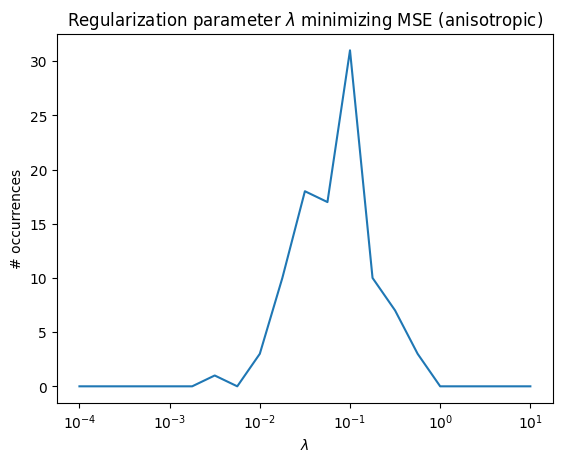

In [17]:
plt.figure()
plt.plot(nb_occurrences)
plt.xticks([0,4,8,12,16,20], [r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$"])
plt.title(r"Regularization parameter $\lambda$ minimizing MSE (anisotropic)")
plt.xlabel(r"$\lambda$")
plt.ylabel("# occurrences")

(array([12.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  0.62,  1.24,  1.86,  2.48,  3.1 ,  3.72,  4.34,  4.96,
         5.58,  6.2 ,  6.82,  7.44,  8.06,  8.68,  9.3 ,  9.92, 10.54,
        11.16, 11.78, 12.4 , 13.02, 13.64, 14.26, 14.88, 15.5 , 16.12,
        16.74, 17.36, 17.98, 18.6 , 19.22, 19.84, 20.46, 21.08, 21.7 ,
        22.32, 22.94, 23.56, 24.18, 24.8 , 25.42, 26.04, 26.66, 27.28,
        27.9 , 28.52, 29.14, 29.76, 30.38, 31.  ]),
 <BarContainer object of 50 artists>)

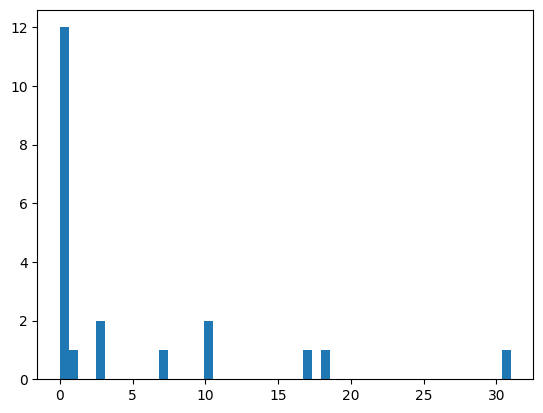

In [23]:
plt.hist(nb_occurrences.T,bins=50)

In [15]:
reg_param_data = np.load('hyperparam_tuning/reg_param_tuning_fine_anisotropic_newbounds_sigma01/tuning_data.npy', allow_pickle=True)

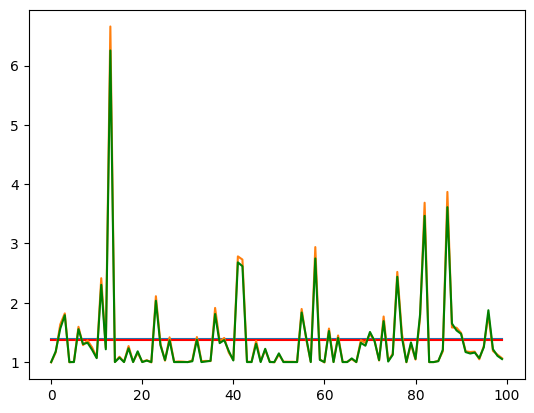

In [19]:
plt.plot(np.ones(100)*np.mean(factors_avg_wrt_best))
plt.plot(np.ones(100)*np.mean(factors_median_wrt_best), 'r')
plt.plot(factors_avg_wrt_best)
plt.plot(factors_median_wrt_best, 'g')

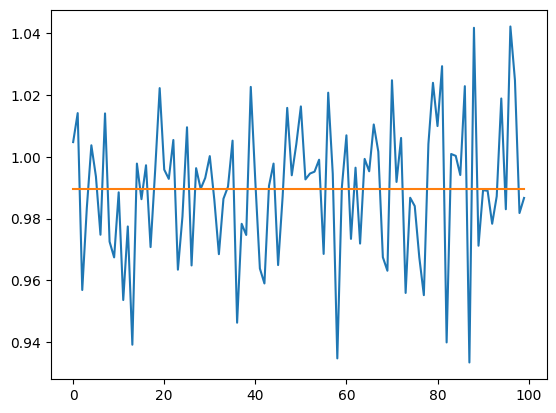

In [20]:
plt.plot(factors_median_wrt_best/factors_avg_wrt_best)
plt.plot(np.mean(factors_median_wrt_best/factors_avg_wrt_best)*np.ones(100))

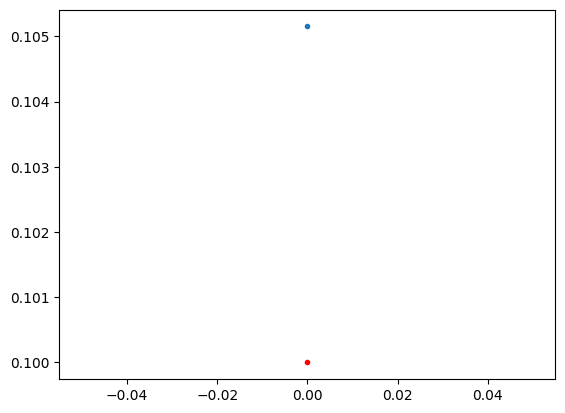

In [21]:
plt.plot(reg_param_mean,'.')
plt.plot(reg_param_median,'.r')

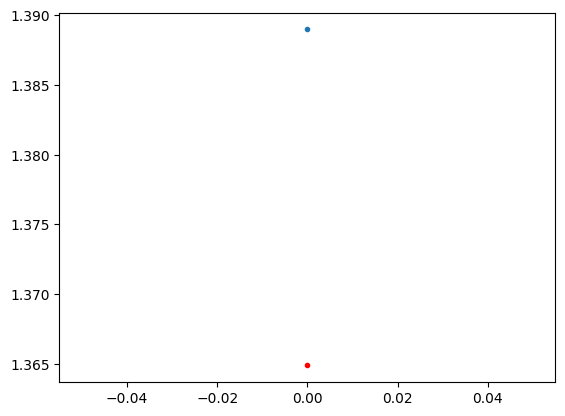

In [24]:
plt.plot(np.mean(factors_avg_wrt_best),'.')
plt.plot(np.mean(factors_median_wrt_best),'r.')

In [12]:
import src.tomo_fusion.tools.helpers as tomo_helps
import src.tomo_fusion.functionals_definition as fct_def
import src.tomo_fusion.hyperparameter_tuning as hyper_tune

/home/dhamm/miniconda3/envs/bayes-plasma-tomo/lib/python3.12/site-packages/pyxu/info/plugin.py:70: ContributionWarning: Plugin `pyxu_diffops.operator:AnisCoherenceEnhancingDiffusionOp` loaded.
  warnings.warn(msg, pxw.ContributionWarning)
/home/dhamm/miniconda3/envs/bayes-plasma-tomo/lib/python3.12/site-packages/pyxu/info/plugin.py:70: ContributionWarning: Plugin `pyxu_diffops.operator:AnisDiffusionOp` loaded.
  warnings.warn(msg, pxw.ContributionWarning)
/home/dhamm/miniconda3/envs/bayes-plasma-tomo/lib/python3.12/site-packages/pyxu/info/plugin.py:70: ContributionWarning: Plugin `pyxu_diffops.operator:AnisEdgeEnhancingDiffusionOp` loaded.
  warnings.warn(msg, pxw.ContributionWarning)
/home/dhamm/miniconda3/envs/bayes-plasma-tomo/lib/python3.12/site-packages/pyxu/info/plugin.py:70: ContributionWarning: Plugin `pyxu_diffops.operator:CurvaturePreservingDiffusionOp` loaded.
  warnings.warn(msg, pxw.ContributionWarning)
/home/dhamm/miniconda3/envs/bayes-plasma-tomo/lib/python3.12/site-pack

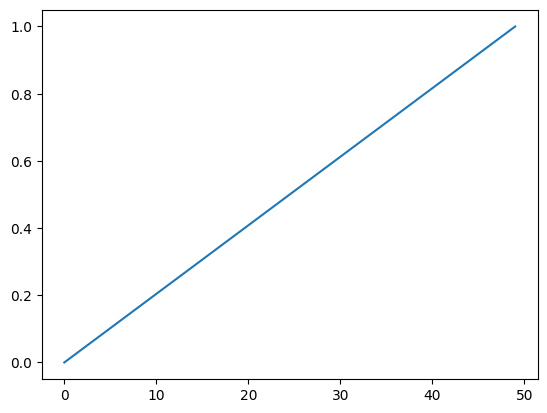

In [13]:
plt.plot(np.linspace(0,1))

In [14]:
anis_param_data = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/tuning_data.npy', allow_pickle=True)
factors_cv_wrt_best_random = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/factors_cv_wrt_best_random.npy')
factors_cv_wrt_best_random_full = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/factors_cv_wrt_best_random_full.npy')
factors_cv_wrt_best_camera = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/factors_cv_wrt_best_camera.npy')
factors_cv_wrt_best_camera_full = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/factors_cv_wrt_best_camera_full.npy')
reg_param_mean = np.load('hyperparam_tuning/anis_param_tuning_fine_anisotropic_newbounds_sigma005/reg_param.npy')

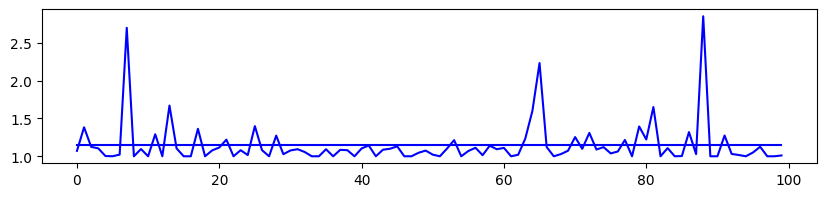

In [15]:
plt.figure(figsize=(10,2))
#plt.plot(factors_cv_wrt_best_camera_full.T, 'r')
#plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_camera_full),'r')
plt.plot(factors_cv_wrt_best_random_full.T, 'b')
plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_random_full),'b')

In [16]:
plt.figure(figsize=(10,2))
#plt.plot(factors_cv_wrt_best_camera_full.T, 'r')
#plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_camera_full),'r')
plt.plot(factors_cv_wrt_true_random_full.T, 'b')
plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_random_full),'b')

NameError: name 'factors_cv_wrt_true_random_full' is not defined

<Figure size 1000x200 with 0 Axes>

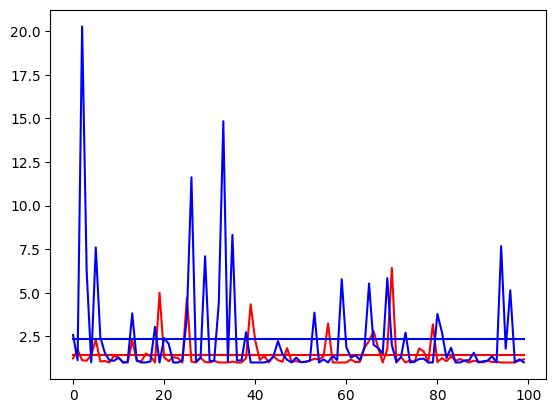

In [17]:
plt.plot(factors_cv_wrt_best_camera.T, 'r')
plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_camera),'r')
plt.plot(factors_cv_wrt_best_random.T, 'b')
plt.plot(np.ones(100)*np.mean(factors_cv_wrt_best_random),'b')

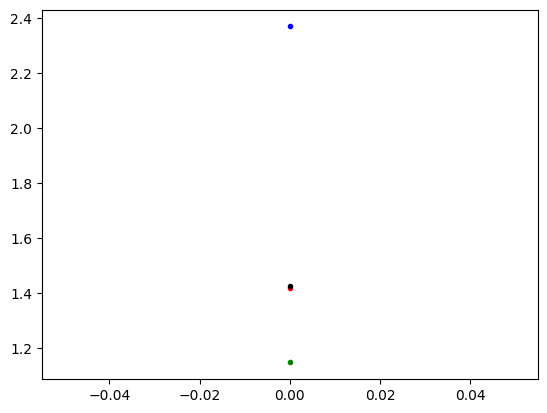

In [18]:
plt.plot(np.mean(factors_cv_wrt_best_random),'b.')
plt.plot(np.mean(factors_cv_wrt_best_random_full),'g.')
plt.plot(np.mean(factors_cv_wrt_best_camera),'r.')
plt.plot(np.mean(factors_cv_wrt_best_camera_full),'k.')

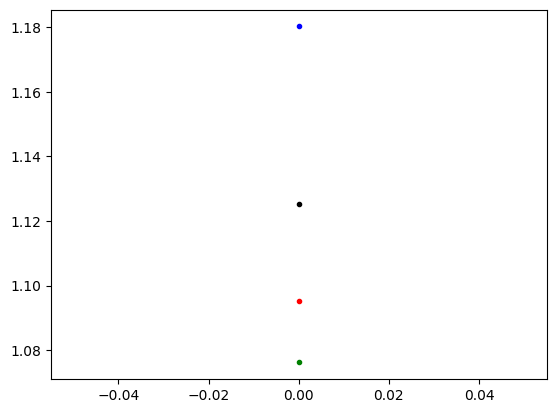

In [19]:
plt.plot(np.median(factors_cv_wrt_best_random),'b.')
plt.plot(np.median(factors_cv_wrt_best_random_full),'g.')
plt.plot(np.median(factors_cv_wrt_best_camera),'r.')
plt.plot(np.median(factors_cv_wrt_best_camera_full),'k.')

(array([79., 12.,  3.,  3.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([1.        , 1.18525727, 1.37051453, 1.5557718 , 1.74102907,
        1.92628633, 2.1115436 , 2.29680087, 2.48205813, 2.6673154 ,
        2.85257267]),
 <BarContainer object of 10 artists>)

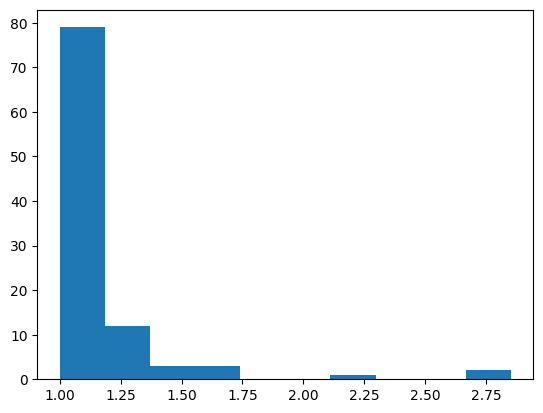

In [20]:
plt.hist(factors_cv_wrt_best_random_full, bins=10)

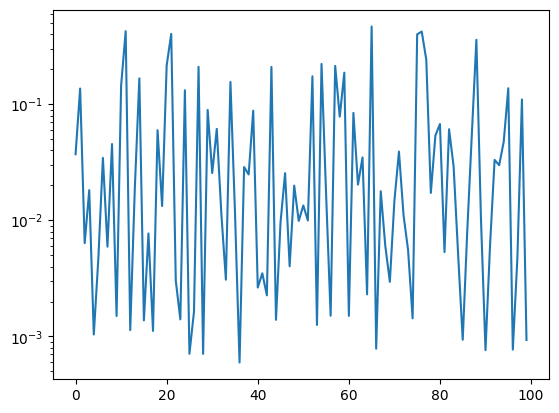

In [21]:
plt.plot(alphas_fine_new_bounds[:100])
plt.yscale('log')